In [2]:
import chess
import chess.engine
import re
from stockfish import Stockfish
import pandas as pd
import chardet


In [3]:
stockfish = Stockfish()
stockfish.update_engine_parameters({"Threads": 8, "Hash": 4096})

file_path = "/Users/nafis-mac/GitHub Repos/Chess-Research-Project/LLM_vs_LLM-output.txt"

In [5]:
move_pattern = re.compile(r"Qwen (white|black) move:\s*([^\s]+)")

board = chess.Board()
game_number = 0

In [6]:
results = []

In [7]:
with open(file_path, 'rb') as f:
        raw_data = f.read()
        encoding_info = chardet.detect(raw_data)
        encoding = encoding_info['encoding']
        print(f"Detected file encoding: {encoding}")

Detected file encoding: UTF-16


In [8]:
with open(file_path, "r", encoding=encoding) as f:
        for line in f:
            # move_average = 0
            line = line.strip()
            
            # If a new game is starting, reset the board.
            if line.startswith("Starting game"):
                board = chess.Board()
                game_number += 1
                move_number = 0
                print(f"\n--- Processing Game Number: {game_number} ---\n")
                continue
            
            # Search for valid move lines
            match = move_pattern.search(line)
            if match:
                move_number += 1
                player = match.group(1)
                move_str = match.group(2)
                move_cps = []
                
                # Get the best move suggestion from Stockfish on the current board state.
                temp_board = board.copy()

                
                stockfish.set_fen_position(temp_board.fen())

                best_move = stockfish.get_best_move()
                temp_board.push_san(best_move)

                stockfish.set_fen_position(temp_board.fen())
                
                for i in range(10):
                    eval = stockfish.get_evaluation()
                    if player == "white" and eval["type"] == "mate":
                         move_cps.append(20000 - eval["value"])
                    elif player == "black" and eval["type"] == "mate":
                         move_cps.append(-20000 - eval["value"])
                    else:
                         move_cps.append(eval["value"])
                best_move_score = sum(move_cps) / len(move_cps)

                # board.pop()

                board.push_san(move_str)
                stockfish.set_fen_position(board.fen())

                for i in range(10):
                    eval = stockfish.get_evaluation()
                    if eval["type"] == "mate":
                         move_cps.append(20000 - eval["value"])
                    else:
                         move_cps.append(eval["value"])
                qwen_move_score = sum(move_cps) / len(move_cps)
                
                print(f"Color: {player} Best: {best_move_score} Actual: {qwen_move_score} Diff: {best_move_score - qwen_move_score} Move: {move_number}")

            results.append({
                "Game Number": game_number,
                "Qwen Color": player,
                "Best Move": best_move,
                "Best Move Score": best_move_score,
                "Qwen Move": move_str,
                "Qwen Move Score": qwen_move_score,
                "Score Difference": best_move_score - qwen_move_score
            })


--- Processing Game Number: 1 ---

Color: white Best: 31.2 Actual: 28.1 Diff: 3.099999999999998 Move: 1
Color: black Best: 32.8 Actual: 30.95 Diff: 1.8499999999999979 Move: 2
Color: white Best: 34.1 Actual: 29.75 Diff: 4.350000000000001 Move: 3
Color: black Best: 36.5 Actual: 33.1 Diff: 3.3999999999999986 Move: 4
Color: white Best: 33.0 Actual: -209.55 Diff: 242.55 Move: 5
Color: black Best: -457.6 Actual: -235.75 Diff: -221.85000000000002 Move: 6
Color: white Best: -22.0 Actual: -232.25 Diff: 210.25 Move: 7
Color: black Best: -445.9 Actual: -206.85 Diff: -239.04999999999998 Move: 8
Color: white Best: 32.1 Actual: -17.2 Diff: 49.3 Move: 9
Color: black Best: -66.1 Actual: 308.8 Diff: -374.9 Move: 10
Color: white Best: 681.2 Actual: 368.35 Diff: 312.85 Move: 11
Color: black Best: 71.9 Actual: 71.5 Diff: 0.4000000000000057 Move: 12
Color: white Best: 71.2 Actual: 23.05 Diff: 48.150000000000006 Move: 13
Color: black Best: -18.7 Actual: -10.7 Diff: -8.0 Move: 14
Color: white Best: -4.2 Act

In [9]:
df = pd.DataFrame(results)
df.to_csv("LLM_vs_LLM_ScoreAnalysis.csv", index=False)
print("Results saved to LLM_vs_LLM_ScoreAnalysis.csv")

Results saved to LLM_vs_LLM_ScoreAnalysis.csv


In [1]:
results

NameError: name 'results' is not defined

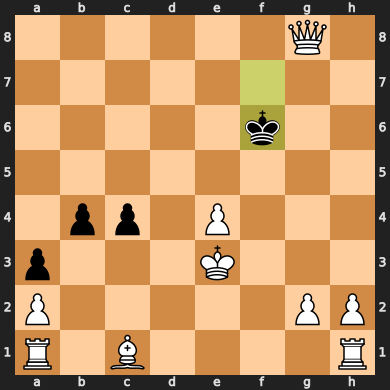

In [8]:
board

# print(stockfish.get_best_move())